In [8]:
import pandas as pd
import tensorflow
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences, to_categorical
from sklearn.model_selection import train_test_split


data = pd.read_csv('tagged_data.csv')
max_words=5000
max_len=200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.tweet)
sequences = tokenizer.texts_to_sequences(data.tweet)
tweets = pad_sequences(sequences,maxlen=max_len)
labels = to_categorical(data.prediction,num_classes=2)

x_train, x_test, y_train,y_test = train_test_split(tweets,labels,test_size=0.1,stratify=labels, random_state=42)

model = Sequential()
model.add(layers.Embedding(max_words,40))
model.add(layers.LSTM(20,dropout=0.5))
model.add(layers.Dense(2,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5",
                              monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True,
                              mode='auto',
                              save_freq='epoch',
                              save_weights_only=False)

history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test), callbacks=[checkpoint])


Epoch 1/10
431/431 [==============================] - ETA: 0s - loss: 0.4049 - accuracy: 0.8105
Epoch 1: val_accuracy improved from -inf to 0.85229, saving model to best_model.hdf5
431/431 [==============================] - 17s 37ms/step - loss: 0.4049 - accuracy: 0.8105 - val_loss: 0.3091 - val_accuracy: 0.8523
Epoch 2/10
431/431 [==============================] - ETA: 0s - loss: 0.2664 - accuracy: 0.8857
Epoch 2: val_accuracy improved from 0.85229 to 0.87908, saving model to best_model.hdf5
431/431 [==============================] - 16s 37ms/step - loss: 0.2664 - accuracy: 0.8857 - val_loss: 0.2766 - val_accuracy: 0.8791
Epoch 3/10
431/431 [==============================] - ETA: 0s - loss: 0.2371 - accuracy: 0.8993
Epoch 3: val_accuracy did not improve from 0.87908
431/431 [==============================] - 16s 37ms/step - loss: 0.2371 - accuracy: 0.8993 - val_loss: 0.2674 - val_accuracy: 0.8791
Epoch 4/10
431/431 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 

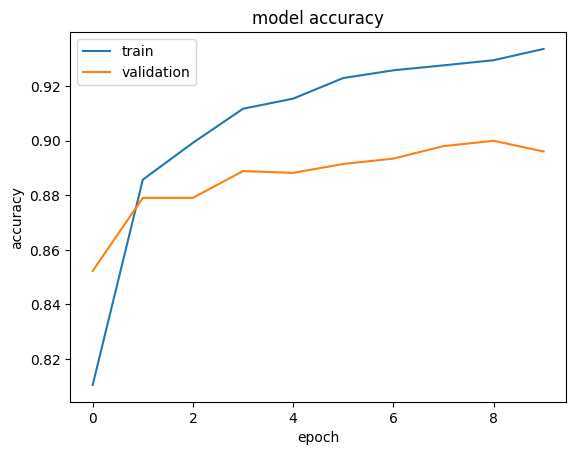

In [14]:
import matplotlib.pyplot as plot
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'validation'], loc='upper left')
plot.show()